In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
keyWords = {'great':4, 'amazing':4, 'awesome':4, 'good':3, 'engaging':3, 'interesting':3, 'easy':3, 'difficult':2, 'challenging':2,'terrible':1, 'bad':1, 'horrible':1}

In [19]:
def load_text(text):
    with open(text, encoding="utf8") as f:
        sample = f.read()
    return sample

In [20]:
def clean_text(text):
    newSoc = text.replace('\n', '')
    newSoc = newSoc.replace(')', ' ')
    newSoc = newSoc.split(' ')
    for x in range(0, len(newSoc)):
        newSoc[x] = newSoc[x].strip('.-,():;!\"\'&') 
        newSoc[x] = newSoc[x].lower()
    return newSoc

In [21]:
def count_freq(textList):
    freq_dict = {}
    
    for x in textList:
        if x in freq_dict:
            freq_dict[x] = freq_dict[x] + 1
        else:
            freq_dict[x] = 1    
    
    return freq_dict

In [48]:
classes = ['CS103.txt', 'Econ160.txt', 'Phil187.txt', 'Phil80.txt', 'Psych50.txt', 'Stats101.txt', 'SymSys1.txt']
scoreList = []

for c in classes:
    socClass = load_text(c)
    soc = clean_text(socClass)    
    freq = count_freq(soc)    
    value, items = 0, 0
    
    for k,v in keyWords.items():
        if k in freq:
            value = value + v*freq[k]
            items = items + freq[k]
            score = value/items       

    scoreList.append(score)

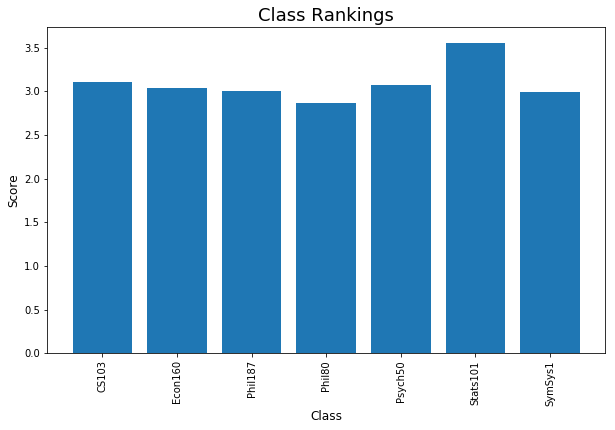

In [50]:
plt.figure(figsize=(10,6))
plt.bar(classes,scoreList)
plt.title('Class Rankings', fontsize=18)
xlabels = ['CS103', 'Econ160', 'Phil187', 'Phil80', 'Psych50', 'Stats101', 'SymSys1']
plt.xticks(classes, xlabels, rotation='vertical')
plt.xlabel('Class',fontsize=12)
plt.ylabel('Score',fontsize=12)
plt.savefig('rankings.png')